In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import os
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

In [3]:
train["세대수별주차면수"] = train["단지내주차면수"]/train["총세대수"]
train["보증금당임대료"] = train["임대료"]/train["임대보증금"]

In [4]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(train.등록차량수[train.세대수별주차면수<train.세대수별주차면수[np.argmin(ee2)]], color="salmon")
sns.distplot(train.등록차량수[train.세대수별주차면수>=train.세대수별주차면수[np.argmin(ee2)]], color="lightseagreen")
plt.show()

NameError: name 'ee2' is not defined

In [ ]:
pd.get_dummies(train[["임대건물구분"]])

In [ ]:
train.groupby("단지코드")

In [5]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명',
       '도로명주소', '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율',
       '세대수별주차면수', '보증금당임대료'],
      dtype='object')

In [6]:
danji = train[["단지코드","단지내주차면수","등록차량수","총세대수","세대당_인구"]].drop_duplicates().reset_index(drop=True)
danji["세대수별주차면수"] = danji["단지내주차면수"]/danji["총세대수"]
danji

,단지코드,단지내주차면수,등록차량수,총세대수,세대당_인구,세대수별주차면수
0,C2515,624.0000,205.0000,545,2.3000,1.1450
1,C1407,"1,285.0000","1,064.0000",1216,2.4200,1.0567
2,C1945,734.0000,730.0000,755,2.6500,0.9722
3,C1470,645.0000,553.0000,696,2.0000,0.9267
4,C1898,517.0000,415.0000,566,2.0000,0.9134
...,...,...,...,...,...,...
409,C2586,66.0000,57.0000,90,2.1050,0.7333
410,C2035,521.0000,246.0000,492,2.4100,1.0589
411,C2020,25.0000,19.0000,40,2.3900,0.6250
412,C2437,30.0000,16.0000,90,2.3000,0.3333


In [7]:
danjis = danji.sort_values(by="세대당_인구").reset_index(drop=True)
danjis

,단지코드,단지내주차면수,등록차량수,총세대수,세대당_인구,세대수별주차면수
0,C2308,200.0000,244.0000,285,1.5900,0.7018
1,C2401,164.0000,19.0000,213,1.6200,0.7700
2,C1004,153.0000,93.0000,521,1.6550,0.2937
3,C1312,527.0000,359.0000,518,1.6700,1.0174
4,C1685,167.0000,164.0000,295,1.7000,0.5661
...,...,...,...,...,...,...
409,C2385,404.0000,552.0000,445,2.8200,0.9079
410,C1005,950.0000,376.0000,1144,2.8200,0.8304
411,C1916,822.0000,752.0000,816,2.8350,1.0074
412,C2173,665.0000,745.0000,775,2.8600,0.8581


In [95]:
danjis.describe()

,단지내주차면수,등록차량수,총세대수,세대수별주차면수
count,414.0000,414.0000,414.0000,414.0000
mean,586.3309,570.1039,724.6691,0.8163
std,363.6656,391.5858,407.8050,0.2418
min,13.0000,13.0000,26.0000,0.1092
25%,318.2500,289.2500,450.2500,0.7186
50%,517.0000,505.0000,633.5000,0.8499
75%,785.7500,760.0000,923.5000,0.9528
max,"1,798.0000","2,550.0000","2,568.0000",1.5449


In [8]:
ee2 = []
for idx,i in enumerate (danjis.세대당_인구):
    ee2.append(np.var(danjis.loc[:idx,"등록차량수"])*idx+ np.var(danjis.loc[idx:,"등록차량수"])*(len(danjis)-idx))

In [141]:
danjis[danjis.세대수별주차면수<0.8304195804195804].shape, danjis[danjis.세대수별주차면수>=0.8304195804195804].shape

((190, 5), (224, 5))

In [11]:
danjis.세대당_인구[np.argmin(ee2)]

2.24

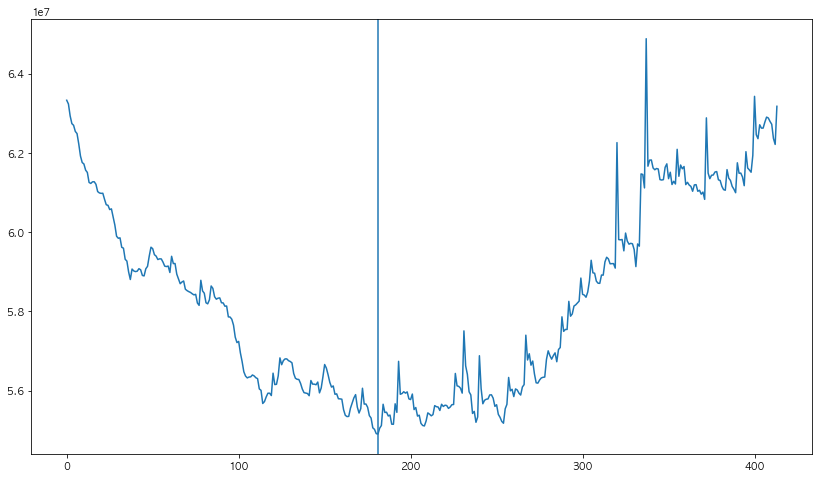

In [10]:
plt.plot(ee2)
plt.axvline(x=np.argmin(ee2))
plt.show()

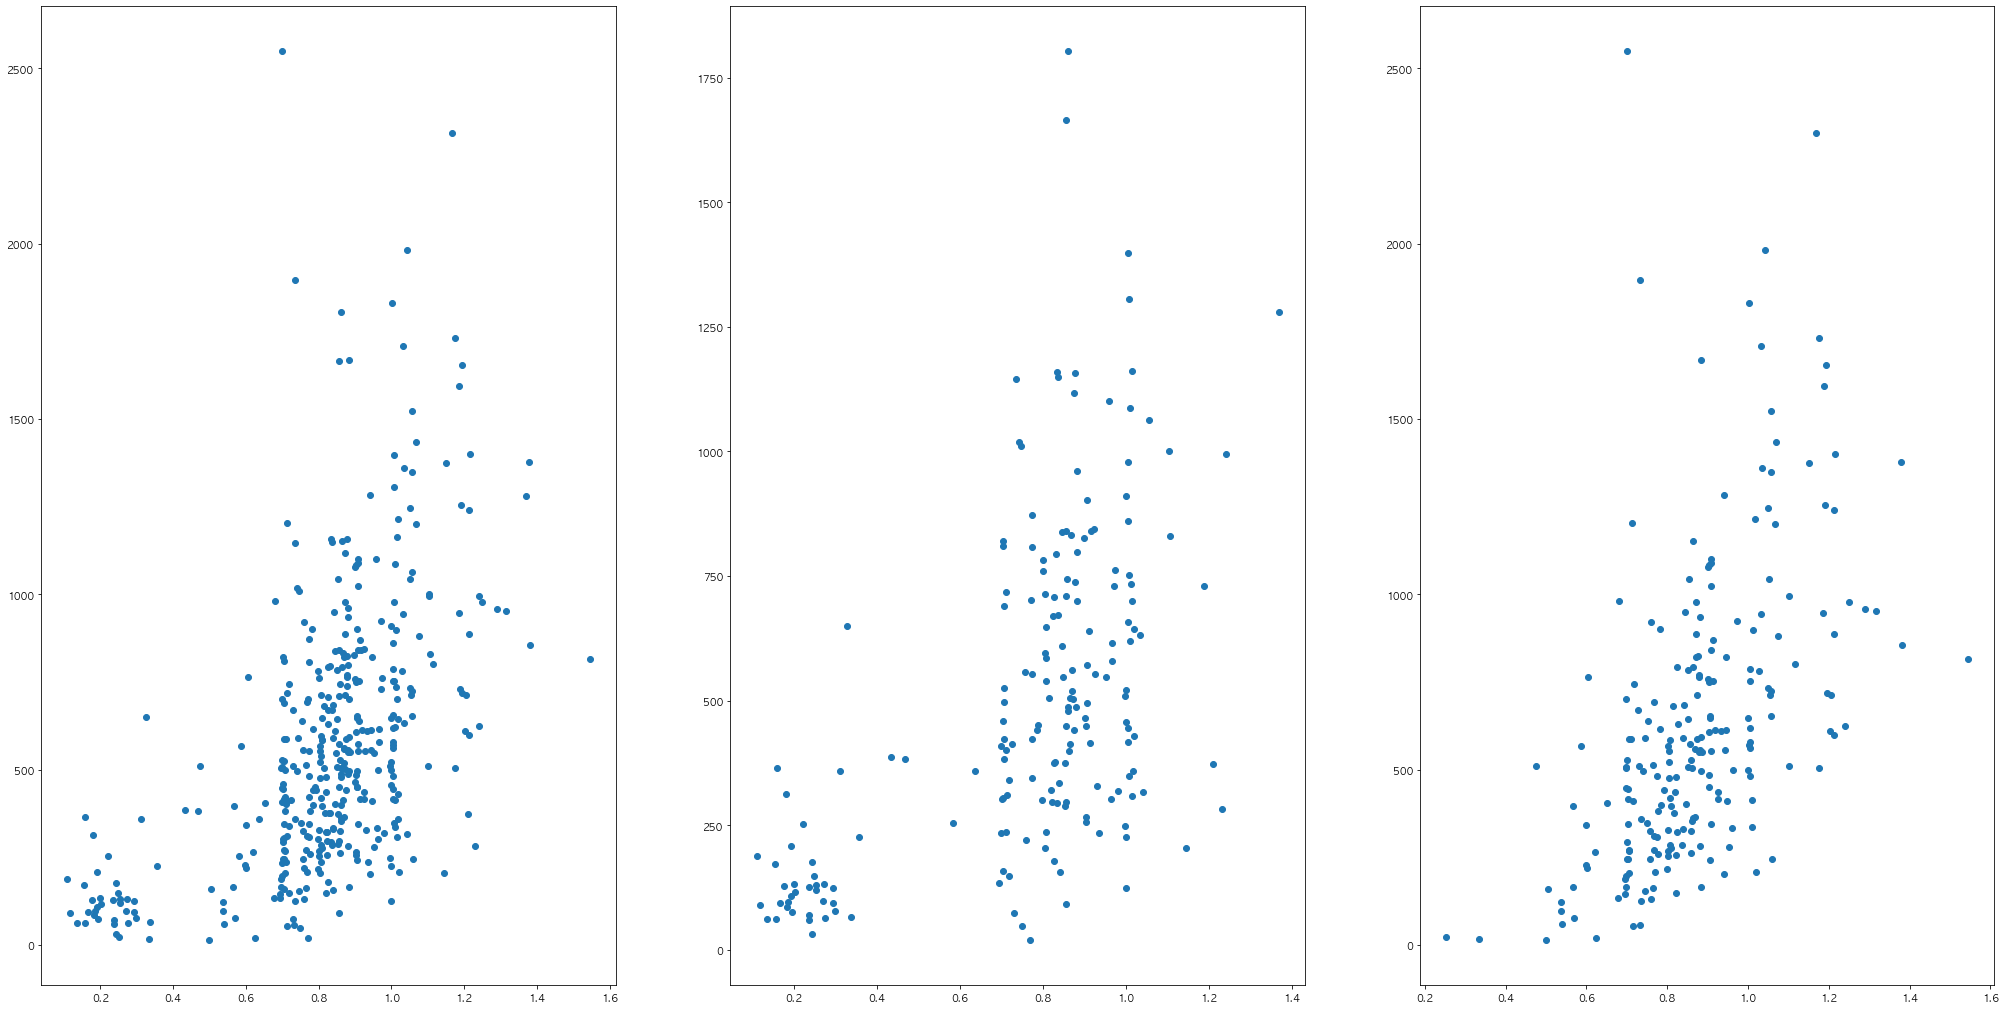

In [99]:
danjis1 = danji[:np.argmin(ee2)]
danjis2= danji[np.argmin(ee2):]
fig= plt.figure(figsize=(35,18))
plt.subplot(1,3,1)
plt.scatter(danjis.세대수별주차면수,danjis.등록차량수)
plt.subplot(1,3,2)
plt.scatter(danjis1.세대수별주차면수,danjis1.등록차량수)
plt.subplot(1,3,3)
plt.scatter(danjis2.세대수별주차면수,danjis2.등록차량수)
plt.show()


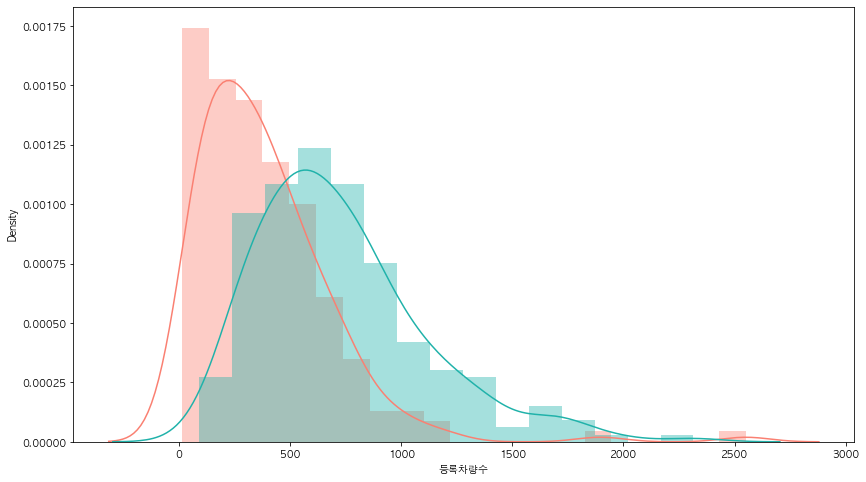

In [100]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(danjis.등록차량수[danjis.세대수별주차면수<danjis.세대수별주차면수[np.argmin(ee2)]], color="salmon")
sns.distplot(danjis.등록차량수[danjis.세대수별주차면수>=danjis.세대수별주차면수[np.argmin(ee2)]], color="lightseagreen")
plt.show()

In [120]:
train.공급유형.unique()

array(['국민임대', '공공임대(50년)', '영구임대', '공공임대(10년)', '공공임대(분납)', '장기전세',
       '공공분양', '행복주택', '공공임대(5년)', '임대상가'], dtype=object)

In [135]:
ttmmp = train[["단지코드","공급유형","등록차량수","세대수별주차면수"]].drop_duplicates()

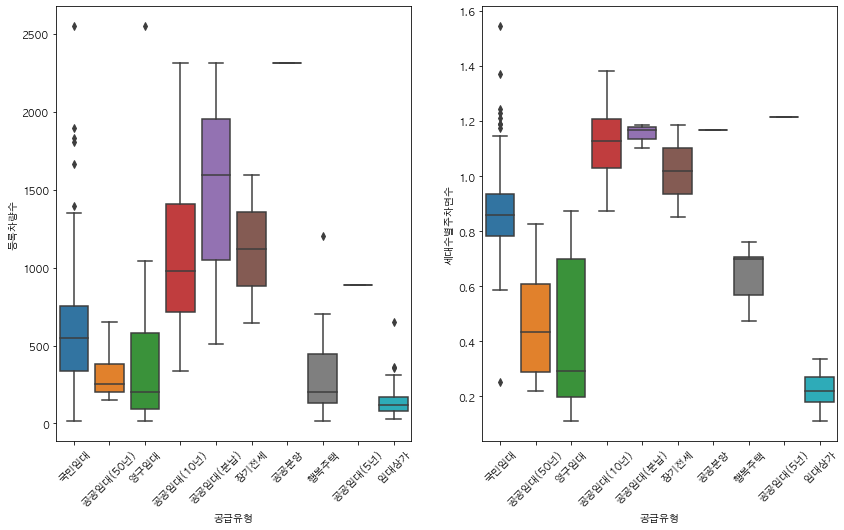

In [136]:
plt.subplot(1,2,1)
sns.boxplot(ttmmp.공급유형,ttmmp.등록차량수)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(ttmmp.공급유형,ttmmp.세대수별주차면수)
plt.xticks(rotation=45)
plt.show()

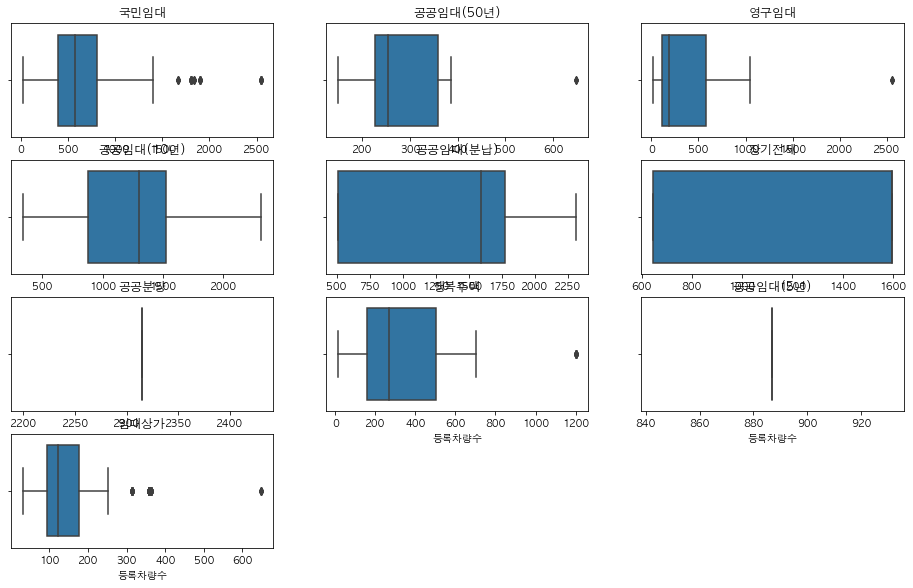

In [123]:
plt.figure(figsize=(16,60))
for i,r in enumerate(train.공급유형.unique()):
    plt.subplot(24,3,i+1)
    sns.boxplot(train.등록차량수[train.공급유형 == r])
    plt.title(r)

In [102]:
tmp = train.groupby("단지코드").mean().reset_index()[["단지코드","보증금당임대료"]]
danjiss = pd.merge(danjis,tmp,on = "단지코드")

In [103]:
tmp2 = train[train.임대건물구분 == "아파트"].groupby("단지코드").mean().reset_index()[["단지코드","보증금당임대료"]]
danjisss = pd.merge(danjis,tmp2,on = "단지코드")

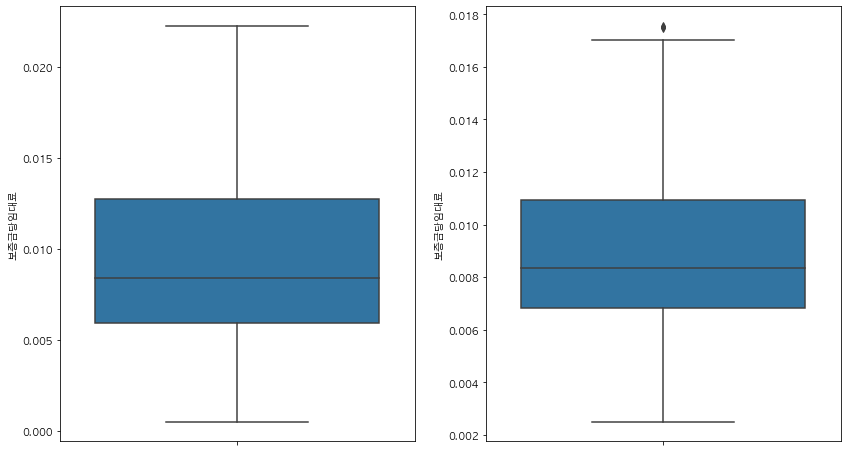

In [109]:
plt.subplot(1,2,1)
sns.boxplot(y = danjisss.보증금당임대료[danjisss.세대수별주차면수<danjisss.세대수별주차면수[np.argmin(ee2)]])
plt.subplot(1,2,2)
sns.boxplot(y = danjisss.보증금당임대료[danjisss.세대수별주차면수>=danjisss.세대수별주차면수[np.argmin(ee2)]])
plt.show()